In [31]:
import pandas as pd
import pylab as pyl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



dataset_path = 'passengers-titanic.csv'
titanic_df = pd.read_csv(dataset_path)

# Quick look at the dataset
titanic_df.head()


,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [32]:
# Quick look at the last 10 rows of the dataset
titanic_df.tail()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male


In [33]:
titanic_df.dtypes

row.names      int64
pclass        object
survived       int64
name          object
age          float64
embarked      object
home.dest     object
room          object
ticket        object
boat          object
sex           object
dtype: object

strings or/+ int = objects and int = int and float == float 

In [34]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


info for all data in the dataset

In [35]:
titanic_df.describe()


,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


descriptive statistics that summarize the tendency of the dataset’s distribution, excluding NaN values.

In [36]:
#  Slice and print the first 10 rows of the 'age' column. 
print(titanic_df[['age']].head(10))

       age
0  29.0000
1   2.0000
2  30.0000
3  25.0000
4   0.9167
5  47.0000
6  63.0000
7  39.0000
8  58.0000
9  71.0000


pandas Series object

In [37]:
# What is the average age over all passengers?
print(titanic_df['age'].mean())

31.19418104265403


In [38]:
#'sex', 'pclass', and 'age'.
titanic_df_relevant = titanic_df[['pclass', 'age', 'sex']]

titanic_df[titanic_df['age'].isnull()][['sex', 'pclass', 'age']]

,sex,pclass,age
12,female,1st,NaN
13,male,1st,NaN
14,male,1st,NaN
29,male,1st,NaN
32,male,1st,NaN
...,...,...,...
1308,male,3rd,NaN
1309,male,3rd,NaN
1310,male,3rd,NaN
1311,female,3rd,NaN


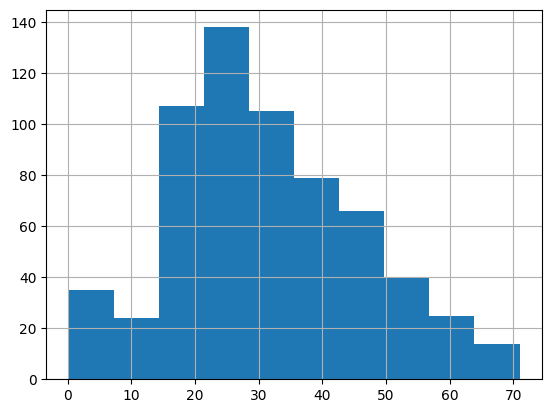

In [39]:
titanic_df['age'].hist()
pyl.show()

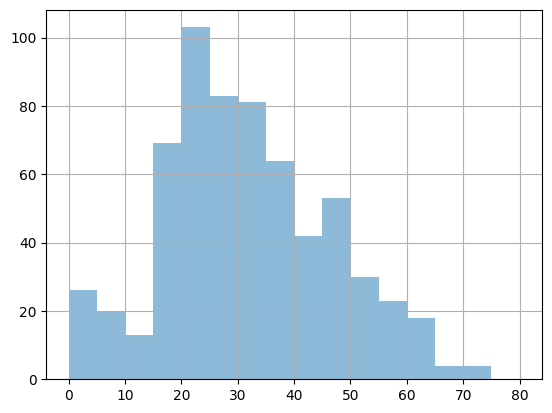

In [40]:
titanic_df['age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
pyl.show()

In [41]:
# Select relevant columns in a new dataframe
titanic_df_relevant = titanic_df[['sex','pclass', 'age' ]].copy()

# Handle missing values in 'age' 
imputer = SimpleImputer(strategy='mean')
titanic_df_relevant['age'] = imputer.fit_transform(titanic_df_relevant[['age']])

# Encode values
label_encoder = LabelEncoder()
titanic_df_relevant['sex'] = label_encoder.fit_transform(titanic_df_relevant['sex'])
titanic_df_relevant['pclass'] = label_encoder.fit_transform(titanic_df_relevant['pclass'])


# Display a few rows of the preprocessed dataframe
#titanic_df_relevant.head(5)
titanic_df_relevant.tail(5)



,sex,pclass,age
1308,1,2,31.194181
1309,1,2,31.194181
1310,1,2,31.194181
1311,0,2,31.194181
1312,1,2,31.194181


In [42]:
# Split the dataset into training and testing sets
X = titanic_df_relevant[['sex','pclass', 'age']]
y = titanic_df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
   
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.2f}')


In [44]:
# Train the Decision Tree classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Evaluate the classifier using the helper function
evaluate_classifier(rf_classifier, X_train, y_train, X_test, y_test)

Accuracy: 0.81
